# MAS - PROJECT
# Plot builder 

In [10]:
import random
import numpy as np
import itertools
import time
import amd_project_functions as amd
import matplotlib.pyplot as plt

In [2]:
class SearchAlgorithm:
    def __init__(self, O, Theta, p, o_XY, v_XY, g, u, L = float('-inf'), CB = set()):
        """
        Initialize the SearchAlgorithm object.
        """
        self.O = O
        self.n = len(O) - 1 # check that 
        self.Theta = Theta
        self.p = p
        self.o_XY = o_XY
        self.v_XY = v_XY
        self.g = g
        self.u = u
        self.L = L
        self.CB = CB

    def search1(self, X, Y, v, d):
        """
        Perform the SEARCH1 algorithm.
        """
        if d == self.n + 1: # end of the tree
            self.CB = X # update the current best X solution (here there is not the check that the best solution is better than the current one. No problem, it there is one before calling the function search)
            self.L = v # update the current best value of X
        else:            
            if self.v_XY(amd.union_listOflists_list(X,self.O[d]), Y, self.O, self.Theta, self.p, self.g, self.u) > self.L:
                self.search1(amd.union_listOflists_list(X,self.O[d]), Y, self.v_XY(amd.union_listOflists_list(X,self.O[d]), Y, self.O, self.Theta, self.p, self.g, self.u), d + 1)

            if self.v_XY(X, amd.union_listOflists_list(Y,self.O[d]), self.O, self.Theta, self.p, self.g, self.u) > self.L:
                self.search1(X,amd.union_listOflists_list(Y,self.O[d]), self.v_XY(X, amd.union_listOflists_list(Y,self.O[d]), self.O, self.Theta, self.p, self.g, self.u), d + 1)          


def branch_and_bound_ds(O, Theta, p, o_XY, v_XY, g, u):
    start_time = time.time()  # Record the start time

    CB = None # initilize the current best solution
    L = float('-inf')
    
    SearchAlgorithm_instance = SearchAlgorithm(O, Theta, p, o_XY, v_XY, g, u, L, CB)
    SearchAlgorithm_instance.search1([], [], 0, 1)
    CB = SearchAlgorithm_instance.CB

    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate the elapsed time

    return CB, round(elapsed_time,2)


In [3]:
class IDA_SearchAlgorithm:
    def __init__(self, O, Theta, p, o_XY, v_XY, g, u, L_initial_limit, CB = None, L_reduction = 0.1):
        """
        Initialize the IDA object.
        """
        self.O = O
        self.n = len(O) - 1 
        self.Theta = Theta
        self.p = p
        self.o_XY = o_XY
        self.v_XY = v_XY
        self.g = g
        self.u = u
        self.L = L_initial_limit
        self.CB = CB
        self.HF = -np.inf # different from the serach alg
        self.L_reduction = L_reduction # different from the serach alg

    def search2(self, X, Y, v, d):
        """
        Perform the SEARCH2 algorithm.
        """
        if d == self.n + 1: # end of the tree
            self.CB = X # update the current best X solution (here there is not the check that the best solution is better than the current one. No problem, it there is one before calling the function search)
            self.L = v # update the current best value of X 
        else:            
            if self.v_XY(amd.union_listOflists_list(X,self.O[d]), Y, self.O, self.Theta, self.p, self.g, self.u) > self.L:
                self.search2(amd.union_listOflists_list(X,self.O[d]), Y, self.v_XY(amd.union_listOflists_list(X,self.O[d]), Y, self.O, self.Theta, self.p, self.g, self.u), d + 1)
            elif self.v_XY(amd.union_listOflists_list(X,self.O[d]), Y, self.O, self.Theta, self.p, self.g, self.u) > self.HF:
                self.HF = self.v_XY(amd.union_listOflists_list(X,self.O[d]), Y, self.O, self.Theta, self.p, self.g, self.u)

            if self.v_XY(X, amd.union_listOflists_list(Y,self.O[d]), self.O, self.Theta, self.p, self.g, self.u) > self.L:
                self.search2(X,amd.union_listOflists_list(Y,self.O[d]), self.v_XY(X, amd.union_listOflists_list(Y,self.O[d]), self.O, self.Theta, self.p, self.g, self.u), d + 1)          
            elif self.v_XY(X, amd.union_listOflists_list(Y,self.O[d]), self.O, self.Theta, self.p, self.g, self.u) > self.HF:
                self.HF = self.v_XY(X, amd.union_listOflists_list(Y,self.O[d]), self.O, self.Theta, self.p, self.g, self.u) 


def ida(O, Theta, p, o_XY, v_XY, g, u, L_initial_limit ,L_reduction = 0.1):
    start_time = time.time()  # Record the start time

    CB = None # initilize the current best solution
    L = L_initial_limit
    
    while CB == None:
        HF = -np.inf
        IDA_SearchAlgorithm_instance = IDA_SearchAlgorithm(O, Theta, p, o_XY, v_XY, g, u, L, CB, L_reduction)
        IDA_SearchAlgorithm_instance.search2([], [], 0, 1)
        CB = IDA_SearchAlgorithm_instance.CB
        HF = IDA_SearchAlgorithm_instance.HF
        L = min(HF, L*(1-L_reduction))

    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate the elapsed time

    return CB, round(elapsed_time,2)

In [4]:
# Define the fitness function V(X)
def fitness(X, Theta, p, g, u):
    return amd.v_X(X, Theta, p, g, u)

# Define how to decode a solution vector s into X
def decode_solution(s, O):
    return [O[i] for i in range(len(s)) if s[i] == 1]

# Initialize population of n individuals
def initialize_population(n, O):
    return [np.random.randint(2, size=len(O)) for _ in range(n)]

# Tournament selection
def tournament_selection(population, fitness_values, new_population_size, tournament_size=3):
    selected = []
    for _ in range(new_population_size):
        participants = random.sample(list(zip(population, fitness_values)), tournament_size)
        winner = max(participants, key=lambda x: x[1])
        selected.append(winner[0])
    return selected

# Crossover
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

# Mutation
def mutate(individual, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip bit
    return individual

# Main evolutionary algorithm
def slea(O, n, new_population_size, tournament_size, max_evaluations, mutation_rate, Theta, p, g, u):
    start_time = time.time()  # Record the start time
    population = initialize_population(n, O)
    evaluations = 0
    
    while evaluations < max_evaluations:
        # Fitness assessment
        fitness_values = [fitness(decode_solution(ind, O), Theta, p, g, u) for ind in population]
        evaluations += len(population)
        
        # Tournament selection
        selected_individuals = tournament_selection(population, fitness_values, new_population_size, tournament_size)
        
        # Generate new individuals through crossover and mutation
        new_population = []
        while len(new_population) < n - new_population_size:
            parents = random.sample(selected_individuals, 2)
            child1, child2 = crossover(parents[0], parents[1])
            new_population.append(mutate(child1, mutation_rate))
            if len(new_population) < n - new_population_size:
                new_population.append(mutate(child2, mutation_rate))
        
        # Create new population
        population = selected_individuals + new_population[:n - new_population_size]

    # Final fitness assessment to get the best solution
    final_fitness_values = [fitness(decode_solution(ind, O), Theta, p, g, u) for ind in population]
    best_index = np.argmax(final_fitness_values)
    best_solution = population[best_index]

    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate the elapsed time
    
    return best_solution, round(fitness(decode_solution(best_solution, O), Theta, p, g, u),2), round(elapsed_time,2)



## Experiments 

### exp 1 - 1 

In [27]:
# Instance values 
number_of_outcomes = 20
minimum_value = -50
maximum_value = 50
number_of_types_list = [10,20,30,40]
beb_elapsed_time_list = [o for o in range(len(number_of_types_list))]

i=0
for number_of_types in number_of_types_list: 
    print(i)
    O = [[i] for i in range(number_of_outcomes)]
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    _, _, beb_elapsed_time_list[i], _, _, _ = amd.find_X(O, Theta, p, amd.o_XY, amd.v_XY, g_instance, u_instance, algorithm = branch_and_bound_ds)
    i+=1

0
1
2
3


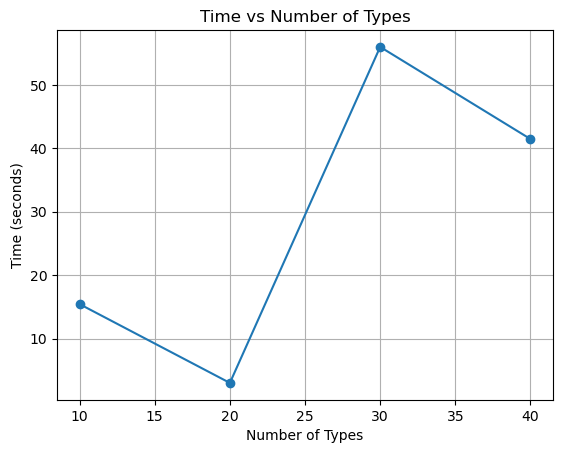

In [28]:
# Plotting
plt.plot(number_of_types_list, beb_elapsed_time_list, marker='o', linestyle='-')
plt.title('Time vs Number of Types')
plt.xlabel('Number of Types')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

In [29]:
# IDA* parameters
L_initial_limit = 80
L_reduction = 0.1

# Instance values 
number_of_outcomes = 20
minimum_value = -50
maximum_value = 50
number_of_types_list = [10,20,30,40]
ida_elapsed_time_list = [o for o in range(len(number_of_types_list))]

i=0
for number_of_types in number_of_types_list:
    print(i)
    O = [[i] for i in range(number_of_outcomes)]
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    _, _, ida_elapsed_time_list[i], _, _, _ = amd.ida_find_X(O, Theta, p, amd.o_XY, amd.v_XY, g_instance, u_instance, L_initial_limit, L_reduction, algorithm = ida)
    i+=1



0
1
2
3


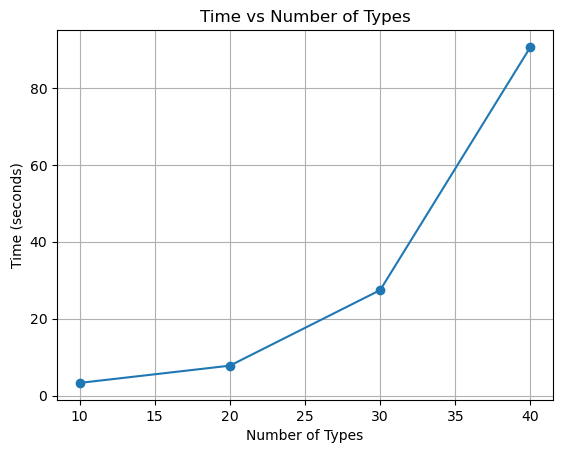

In [30]:
# Plotting
plt.plot(number_of_types_list, ida_elapsed_time_list, marker='o', linestyle='-')
plt.title('Time vs Number of Types')
plt.xlabel('Number of Types')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

In [31]:
# Parameters
max_evaluations = 3000  # Maximum number of fitness evaluations
population_size = 30 # Number of individuals in the population
new_population_size = 10  # Number of individuals to generate in each generation
tournament_size = 3
mutation_rate = 0.1

# Instance values 
number_of_outcomes = 20
minimum_value = -50
maximum_value = 50
number_of_types_list = [10,20,30,40]
slea_elapsed_time_list = [o for o in range(len(number_of_types_list))]

i=0
for number_of_types in number_of_types_list:
    print(i)
    O = [[i] for i in range(number_of_outcomes)]
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    # Solve 
    _,_ ,slea_elapsed_time_list[i] = slea(
        O=O,
        n=population_size,
        new_population_size=new_population_size,
        tournament_size=tournament_size,
        max_evaluations=max_evaluations,
        mutation_rate=0.1,
        Theta=Theta,
        p=p, 
        g=g_instance.g,
        u=u_instance.u
    )
    i+=1

0
1
2
3


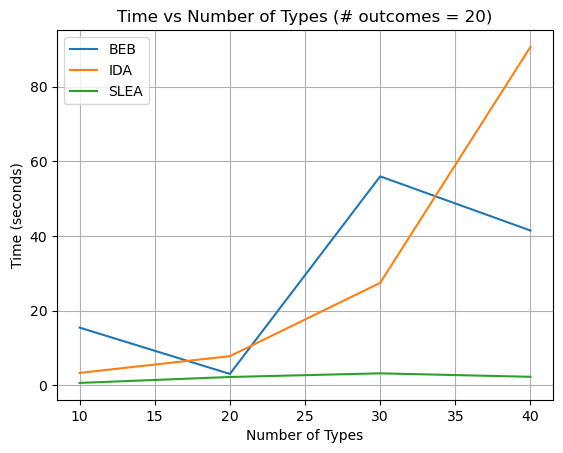

In [32]:
# Plotting
plt.plot(number_of_types_list, beb_elapsed_time_list, label='BEB')
plt.plot(number_of_types_list, ida_elapsed_time_list, label='IDA')
plt.plot(number_of_types_list, slea_elapsed_time_list, label='SLEA')

# Adding labels and legend
plt.title('Time vs Number of Types (# outcomes = 20)')
plt.xlabel('Number of Types')
plt.ylabel('Time (seconds)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Exp 1 - 2

In [33]:
# Instance values 
number_of_outcomes_list = [10,15,20,25]
minimum_value = -50
maximum_value = 50
number_of_types = 20
beb_elapsed_time_list = [o for o in range(len(number_of_types_list))]

i=0
for number_of_outcomes in number_of_outcomes_list: 
    print(i)
    O = [[i] for i in range(number_of_outcomes)]
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    _, _, beb_elapsed_time_list[i], _, _, _ = amd.find_X(O, Theta, p, amd.o_XY, amd.v_XY, g_instance, u_instance, algorithm = branch_and_bound_ds)
    i+=1

0
1
2
3


In [34]:
# IDA* parameters
L_initial_limit = 80
L_reduction = 0.1

# Instance values 
number_of_outcomes_list = [10,15,20,25]
minimum_value = -50
maximum_value = 50
number_of_types = 20
beb_elapsed_time_list = [o for o in range(len(number_of_types_list))]

i=0
for number_of_outcomes in number_of_outcomes_list: 
    print(i)
    O = [[i] for i in range(number_of_outcomes)]
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    _, _, beb_elapsed_time_list[i], _, _, _ = amd.ida_find_X(O, Theta, p, amd.o_XY, amd.v_XY, g_instance, u_instance, L_initial_limit, L_reduction, algorithm = ida)
    i+=1

0
1
2
3


In [35]:
# Parameters
max_evaluations = 3000  # Maximum number of fitness evaluations
population_size = 30 # Number of individuals in the population
new_population_size = 10  # Number of individuals to generate in each generation
tournament_size = 3
mutation_rate = 0.1

# Instance values 
number_of_outcomes_list = [10,15,20,25]
minimum_value = -50
maximum_value = 50
number_of_types = 20
slea_elapsed_time_list = [o for o in range(len(number_of_types_list))]

i=0
for number_of_outcomes in number_of_outcomes_list:
    O = [[i] for i in range(number_of_outcomes)]
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    # Solve 
    _,_ ,slea_elapsed_time_list[i] = slea(
        O=O,
        n=population_size,
        new_population_size=new_population_size,
        tournament_size=tournament_size,
        max_evaluations=max_evaluations,
        mutation_rate=0.1,
        Theta=Theta,
        p=p, 
        g=g_instance.g,
        u=u_instance.u
    )
    i+=1

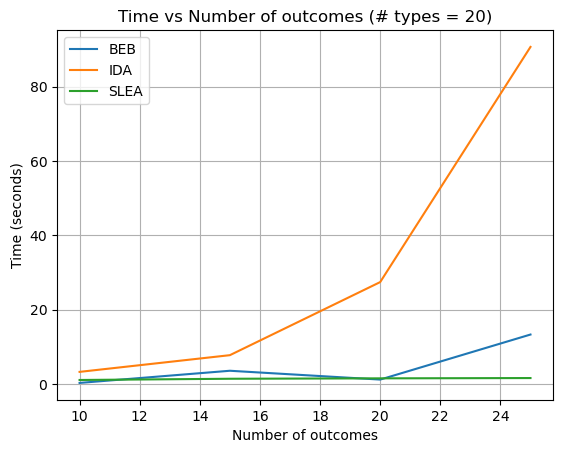

In [36]:
# Plotting
plt.plot(number_of_outcomes_list, beb_elapsed_time_list, label='BEB')
plt.plot(number_of_outcomes_list, ida_elapsed_time_list, label='IDA')
plt.plot(number_of_outcomes_list, slea_elapsed_time_list, label='SLEA')

# Adding labels and legend
plt.title('Time vs Number of outcomes (# types = 20)')
plt.xlabel('Number of outcomes')
plt.ylabel('Time (seconds)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## 2 - 1 and 2
Is the same of before but changing the min and max number of values 

# Bartering 

In [191]:
# An instance
number_of_items = 10
number_of_outcomes_list = [10,15,20,25]
number_of_types = 20
minimum_value = 0 # try -5
maximum_value = 10 # try 5
beb_elapsed_time_list = [o for o in range(len(number_of_outcomes_list))]

i=0
for number_of_outcomes in number_of_outcomes_list: 
    print(i)
    all_possible_outcomes = list(itertools.product([0, 1], repeat=number_of_items))
    O = random.sample(all_possible_outcomes, number_of_outcomes)
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_bartering_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_bartering_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value) 
    _, _, beb_elapsed_time_list[i], _, _, _ = amd.find_X(O, Theta, p, amd.o_XY, amd.v_XY, g_instance, u_instance, algorithm = branch_and_bound_ds)
    i+=1

0
1
2
3


In [192]:
# IDA* parameters
L_initial_limit = 80
L_reduction = 0.1

# An instance
number_of_items = 10
number_of_outcomes_list = [10,15,20,25]
number_of_types = 20
minimum_value = 0 # try -5
maximum_value = 10 # try 5
ida_elapsed_time_list = [o for o in range(len(number_of_outcomes_list))]

i=0
for number_of_outcomes in number_of_outcomes_list: 
    print(i)
    all_possible_outcomes = list(itertools.product([0, 1], repeat=number_of_items))
    O = random.sample(all_possible_outcomes, number_of_outcomes)
    Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
    p = lambda theta: 1/len(Theta)
    g_instance = amd.g_bartering_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
    u_instance = amd.u_bartering_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value) 
    _, _, ida_elapsed_time_list[i], _, _, _ = amd.ida_find_X(O, Theta, p, amd.o_XY, amd.v_XY, g_instance, u_instance, L_initial_limit, L_reduction, algorithm = ida)
    i+=1

0
1
2
3


In [204]:
# Parameters
max_evaluations = 3000  # Maximum number of fitness evaluations
population_size = 30 # Number of individuals in the population
new_population_size = 10  # Number of individuals to generate in each generation
tournament_size = 3
mutation_rate = 0.1

# An instance
number_of_items = 10
number_of_outcomes = 20 #[10,15,20,25]
number_of_types = 20 
minimum_value = 0 # try -5
maximum_value = 10 # try 5
#beb_elapsed_time_list = [o for o in range(4)]


all_possible_outcomes = list(itertools.product([0, 1], repeat=number_of_items))
O = random.sample(all_possible_outcomes, number_of_outcomes)
Theta = [i for i in range(number_of_types)] # theta in Theta is just the type of the agent (so, g will be indepedent form theta)
p = lambda theta: 1/len(Theta)
g_instance = amd.g_bartering_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value)
u_instance = amd.u_bartering_class(Theta, O, minimum_value=minimum_value, maximum_value=maximum_value) 
# Solve 
_,_ ,slea_elapsed_time_list[2] = slea(
    O=O,
    n=population_size,
    new_population_size=new_population_size,
    tournament_size=tournament_size,
    max_evaluations=max_evaluations,
    mutation_rate=0.1,
    Theta=Theta,
    p=p, 
    g=g_instance.g,
    u=u_instance.u
)



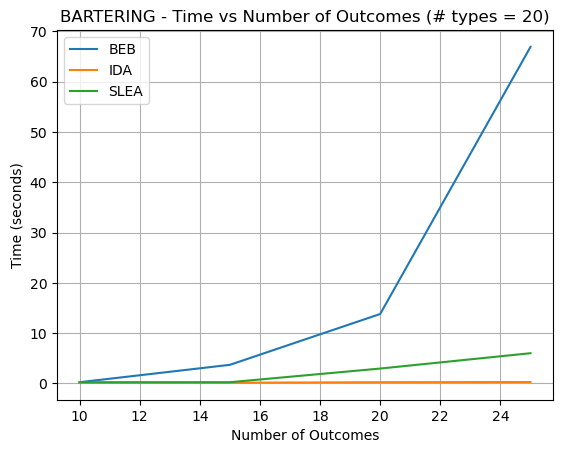

In [205]:
number_of_outcomes_list = [10,15,20,25]


# Plotting
plt.plot(number_of_outcomes_list, beb_elapsed_time_list, label='BEB')
plt.plot(number_of_outcomes_list, ida_elapsed_time_list, label='IDA')
plt.plot(number_of_outcomes_list, slea_elapsed_time_list, label='SLEA')

# Adding labels and legend
plt.title('BARTERING - Time vs Number of Outcomes (# types = 20)')
plt.xlabel('Number of Outcomes')
plt.ylabel('Time (seconds)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()